In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1) + 2.0
print(X_tst.shape)

cfg = unit_1x2_uniform_23_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = unit_net.Net
Generator = uniform_23_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/unit_1x2_uniform_23/model-400000


2019-01-30 01:21:28,078:INFO:Restoring parameters from experiments/unit_1x2_uniform_23/model-400000
2019-01-30 01:21:31,461:INFO:TEST BATCH-0: t = 3.3549, Net_Loss: -1.747721, Revenue: 1.747721
2019-01-30 01:21:31,465:INFO:TEST BATCH-1: t = 3.3570, Net_Loss: -1.757418, Revenue: 1.757418
2019-01-30 01:21:31,470:INFO:TEST BATCH-2: t = 3.3590, Net_Loss: -1.767115, Revenue: 1.767115
2019-01-30 01:21:31,473:INFO:TEST BATCH-3: t = 3.3609, Net_Loss: -1.776813, Revenue: 1.776813
2019-01-30 01:21:31,477:INFO:TEST BATCH-4: t = 3.3628, Net_Loss: -1.786510, Revenue: 1.786510
2019-01-30 01:21:31,481:INFO:TEST BATCH-5: t = 3.3648, Net_Loss: -1.796207, Revenue: 1.796207
2019-01-30 01:21:31,485:INFO:TEST BATCH-6: t = 3.3668, Net_Loss: -1.805904, Revenue: 1.805904
2019-01-30 01:21:31,490:INFO:TEST BATCH-7: t = 3.3688, Net_Loss: -1.815601, Revenue: 1.815601
2019-01-30 01:21:31,493:INFO:TEST BATCH-8: t = 3.3707, Net_Loss: -1.825298, Revenue: 1.825298
2019-01-30 01:21:31,497:INFO:TEST BATCH-9: t = 3.3726,

2019-01-30 01:21:31,822:INFO:TEST BATCH-86: t = 3.5844, Net_Loss: -2.168253, Revenue: 2.168253
2019-01-30 01:21:31,826:INFO:TEST BATCH-87: t = 3.5876, Net_Loss: -2.168267, Revenue: 2.168267
2019-01-30 01:21:31,830:INFO:TEST BATCH-88: t = 3.5903, Net_Loss: -2.168282, Revenue: 2.168282
2019-01-30 01:21:31,834:INFO:TEST BATCH-89: t = 3.5939, Net_Loss: -2.168296, Revenue: 2.168296
2019-01-30 01:21:31,838:INFO:TEST BATCH-90: t = 3.5970, Net_Loss: -2.168311, Revenue: 2.168311
2019-01-30 01:21:31,843:INFO:TEST BATCH-91: t = 3.6014, Net_Loss: -2.168325, Revenue: 2.168325
2019-01-30 01:21:31,846:INFO:TEST BATCH-92: t = 3.6035, Net_Loss: -2.168340, Revenue: 2.168340
2019-01-30 01:21:31,851:INFO:TEST BATCH-93: t = 3.6072, Net_Loss: -2.168355, Revenue: 2.168355
2019-01-30 01:21:31,854:INFO:TEST BATCH-94: t = 3.6102, Net_Loss: -2.168370, Revenue: 2.168370
2019-01-30 01:21:31,858:INFO:TEST BATCH-95: t = 3.6126, Net_Loss: -2.168383, Revenue: 2.168383
2019-01-30 01:21:31,861:INFO:TEST BATCH-96: t = 3.

2019-01-30 01:21:32,160:INFO:TEST BATCH-172: t = 3.8600, Net_Loss: -2.199378, Revenue: 2.199378
2019-01-30 01:21:32,163:INFO:TEST BATCH-173: t = 3.8626, Net_Loss: -2.200200, Revenue: 2.200200
2019-01-30 01:21:32,168:INFO:TEST BATCH-174: t = 3.8661, Net_Loss: -2.201022, Revenue: 2.201022
2019-01-30 01:21:32,171:INFO:TEST BATCH-175: t = 3.8691, Net_Loss: -2.201844, Revenue: 2.201844
2019-01-30 01:21:32,176:INFO:TEST BATCH-176: t = 3.8732, Net_Loss: -2.202666, Revenue: 2.202666
2019-01-30 01:21:32,179:INFO:TEST BATCH-177: t = 3.8759, Net_Loss: -2.203488, Revenue: 2.203488
2019-01-30 01:21:32,185:INFO:TEST BATCH-178: t = 3.8805, Net_Loss: -2.204310, Revenue: 2.204310
2019-01-30 01:21:32,187:INFO:TEST BATCH-179: t = 3.8826, Net_Loss: -2.205132, Revenue: 2.205132
2019-01-30 01:21:32,191:INFO:TEST BATCH-180: t = 3.8856, Net_Loss: -2.205954, Revenue: 2.205954
2019-01-30 01:21:32,196:INFO:TEST BATCH-181: t = 3.8893, Net_Loss: -2.206776, Revenue: 2.206776
2019-01-30 01:21:32,200:INFO:TEST BATCH-

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

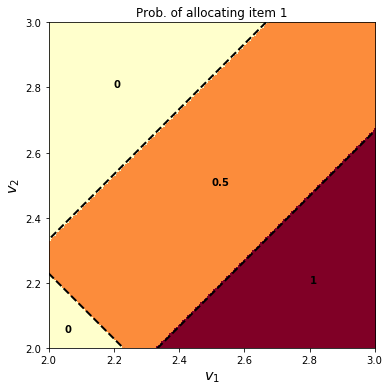

In [6]:
x1 = 4.0/3.0 + np.sqrt(4.0 + 3.0/2.0)/3.0
points1 = [(3.0 - 1.0/3.0, 3.0), (2.0, 2.0 + 1.0/3.0)]                    
points2 = [(2.0, 2 * x1 - 2.0), (2 * x1 - 2.0, 2.0)]                 
points3 = [(2.0 + 1.0/3.0, 2.0), (3.0, 3.0 - 1.0/3.0)]

x_1 = list(map(lambda x: x[0], points1))
y_1 = list(map(lambda x: x[1], points1))
x_2 = list(map(lambda x: x[0], points2))
y_2 = list(map(lambda x: x[1], points2))
x_3 = list(map(lambda x: x[0], points3))
y_3 = list(map(lambda x: x[1], points3))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))
ax.plot(x_1, y_1, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_2, y_2, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_3, y_3, linewidth = 2, linestyle = '--', color='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[2,3,2,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')

plt.text(2.2, 2.8, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.05, 2.05, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.5, 2.5, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(2.8, 2.2, s='1', color='black', fontsize='10', fontweight='bold')
                    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

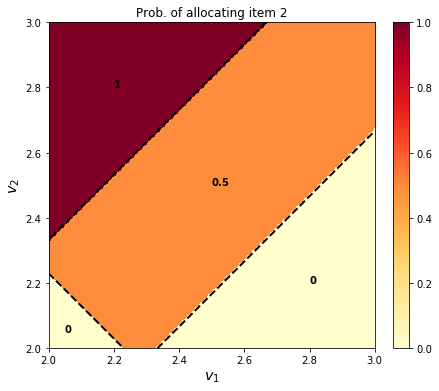

In [7]:
x1 = 4.0/3.0 + np.sqrt(4.0 + 3.0/2.0)/3.0
points1 = [(3.0 - 1.0/3.0, 3.0), (2.0, 2.0 + 1.0/3.0)]
points2 = [(2.0, 2 * x1 - 2.0), (2 * x1 - 2.0, 2.0)]
points3 = [(2.0 + 1.0/3.0, 2.0), (3.0, 3.0 - 1.0/3.0)]

x_1 = list(map(lambda x: x[0], points1))
y_1 = list(map(lambda x: x[1], points1))
x_2 = list(map(lambda x: x[0], points2))
y_2 = list(map(lambda x: x[1], points2))
x_3 = list(map(lambda x: x[0], points3))
y_3 = list(map(lambda x: x[1], points3))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

ax.plot(x_1, y_1, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_2, y_2, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_3, y_3, linewidth = 2, linestyle = '--', color='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[2,3,2,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')

plt.text(2.2, 2.8, s='1', color='black', fontsize='10', fontweight='bold')
plt.text(2.05, 2.05, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.5, 2.5, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(2.8, 2.2, s='0', color='black', fontsize='10', fontweight='bold')
                    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')

_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)